# Pru Wealth Data Test

Below we will explore a mock database of customers, policies and funds that are similar to the Pru Wealth data. The first section of this notebook will test your SQL skills, the second section will test your Python skills and visualisation skills.

The database file is called Prudential_Data.db

The three tables included in this database are:
* Customer_Table
* Policy_Table
* Fund_Table

You will need to have the following packages installed in your Python environment:
* numpy
* pandas
* sqlite3

For visualization use any package of your choice (e.g., matplotlib, seaborn, plotly).

Please complete and return the test before the deadline by emailing your copy of this notebook to: Denholm.Hesse@Prudential.co.uk. If you do not know the answer to a question feel free to use Google and Stack Overflow. This is to give you the option to teach yourself a concept from the internet to address a question which you do not know the answer to, please refrain from skipping questions. The test is meant to be completed by you only.

Good luck and have fun!

In [1]:
import numpy as np
import pandas as pd
import sqlite3

# SQL test

IMPORANT: Please make sure all questions in this section are solved using SQL by only editing the content of the variable *sqlite_query*. Please do not edit the below cell:

In [2]:
# Establish DB connection
conn = sqlite3.connect('Prudential_Data.db')

Below is an example of how to query the SQLlite databse from this Jupyter notebook. Please note that SQLlite might have a slightly different syntax from the SQL you normally use. Please do not edit the below cell:

In [3]:
sqlite_query = """
SELECT COUNT(*) 
from policy_table 
"""

pd.read_sql(sqlite_query, conn)

,COUNT(*)
0,1635


The first table "Customer_Table" contains personal information about the customers. Please do not edit the below cell:

In [4]:
sqlite_query = """
SELECT * 
from Customer_Table 
limit 5
"""

pd.read_sql(sqlite_query, conn)

,index,Customer ID,Email,Gender,Age,Postcode
0,0,CO183683,NLUPPITT14@PARALLELS.COM,Male,90,None
1,1,CO314757,None,Female,90,None
2,2,CO720602,None,Female,90,None
3,3,CO34804,None,Female,90,1495-701
4,4,CO474411,None,Male,90,301288


The second table "Policy_Table" contains data relating to customer policies. The policy value is the current value of the policy. Please do not edit the below cell:

In [5]:
sqlite_query = """
SELECT * 
from Policy_Table 
limit 5
"""

pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Product Category,Product Name,Policy Value,Policy Start Date
0,0,RET100072,CO276506,RETIREMENT,RETIREMENT ACCOUNT,270033.0,2016-01-02 00:00:00
1,1,RET100931,CO831289,RETIREMENT,RETIREMENT ACCOUNT,26394.0,2016-01-04 00:00:00
2,2,RET100682,CO784249,RETIREMENT,RETIREMENT ACCOUNT,773567.0,2016-01-04 00:00:00
3,3,RET100447,CO295533,RETIREMENT,RETIREMENT ACCOUNT,35512.0,2016-01-07 00:00:00
4,4,RET100390,CO901735,RETIREMENT,RETIREMENT ACCOUNT,767580.0,2016-01-08 00:00:00


The final table "Fund_Table" contains historic data on the Policy Value (Policy_Value_Snapshot). The Policy_Value_Snapshot represents the value of the policy and the Date column is the date at which that value was recorded. The value may have changed overtime due to changes in the fund price or quanity of units the policy was invested in. Please do not edit the below cell:

In [6]:
sqlite_query = """
SELECT 
*
from Fund_Table
limit 5

"""

pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Date,Product Category,Product Name,Policy_Value_Snapshot
0,0,ANN1221,CO408564,2009-10-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
1,1,ANN1221,CO408564,2009-11-30 00:00:00,ANNUITY,STANDARD ANNUITY,None
2,2,ANN1221,CO408564,2009-12-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
3,3,ANN1221,CO408564,2010-01-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
4,4,ANN1221,CO408564,2010-02-28 00:00:00,ANNUITY,STANDARD ANNUITY,None


If a question requires additional explanation for your answer, please add additional cells below the code. 

## Q1: What is the current average policy value split by each product name? 

In [13]:
sqlite_query = """
SELECT "Product Name", AVG("Policy Value") from Policy_Table
GROUP BY "Product Name"
"""

pd.read_sql(sqlite_query, conn)

,Product Name,"AVG(""Policy Value"")"
0,CORPORATE MEMBERSHIP,5697.285714
1,FOCUSSED ISA,5746.341270
2,NHS PENSION,5241.500000
3,PRU BOND,4516.389831
4,PRUDENTIAL INVESTMENT PLAN,5084.515152
5,PRUDENTIAL ISA,5161.135593
6,RETIREMENT ACCOUNT,504964.959960
7,SIPP,5335.842466
8,STANDARD ANNUITY,NaN


## Q2: How many customers opened a new policy in Q1 2017 who already had an existing pension product? 

In [50]:
sqlite_query = """
SELECT COUNT("Customer ID")
FROM Policy_Table
WHERE "Policy Start Date" BETWEEN '2016-12-31 00:00:00' AND '2017-03-31 00:00:00'
AND "Customer ID" IN
(SELECT "Customer ID" from Fund_Table where "Product Category"='PENSION' and "Date" < '2017-01-01');
"""

pd.read_sql(sqlite_query, conn)

,"COUNT(""Customer ID"")"
0,35


## Q3: What was the customer ID that had the biggest difference in policy value between its earliest and latest date (for any product) ?

In [43]:
sqlite_query = """
select "Customer ID", "Product Category", MAX("Policy_Value_Snapshot") - MIN("Policy_Value_Snapshot") as "Diff" from Fund_Table

"""

pd.read_sql(sqlite_query, conn)

,Customer ID,Product Category,Diff
0,CO771962,PENSION,999670.0


# Python Test

Same data, but now let's have some fun in python. Please do not use SQL for this part of the exercise. 

Feel free to add more cells of code or text

In [51]:
Customer_Table = pd.read_sql('SELECT * FROM Customer_Table', conn)
Policy_Table = pd.read_sql('SELECT * FROM Policy_Table', conn)
Fund_Table = pd.read_sql('SELECT * FROM Fund_Table', conn)

## Q4: Produce a list of customers which have an invalid email address. What do you notice about these customers? ##

Feel free to use any packages of your choice

In [113]:
Customer_Table.fillna("",inplace=True)

Email_Check = []

# import re module 
# re module provides support for regular expressions
import re
 
# Make a regular expression for validating an Email
regex = '^(\w|\.|\_|\-)+[@](\w|\_|\-|\.)+[.]\w{2,3}$'
 
# Define a function for validating an Email
 
def check(email):
 
    # pass the regular expression and the string in search() method

    if(re.search(regex, email)):
        Email_Check.append("Valid Email")

    else:
        Email_Check.append("Invalid Email")
 
 
# Driver Code
if __name__ == '__main__':
 
    # Iterate over emails
    for i in range(len(Customer_Table)):
        email = Customer_Table.Email[i]
        check(email)

Email_Check = pd.DataFrame(Email_Check)
Email_Check.columns = ['Validation']
Email_Check = Email_Check.join(Customer_Table)

In [118]:
Email_Check.loc[(Email_Check['Validation'] == 'Invalid Email')] 

,Validation,index,Customer ID,Email,Gender,Age,Postcode
1,Invalid Email,1,CO314757,,Female,90,
2,Invalid Email,2,CO720602,,Female,90,
3,Invalid Email,3,CO34804,,Female,90,1495-701
4,Invalid Email,4,CO474411,,Male,90,301288
5,Invalid Email,5,CO777973,,Female,90,
6,Invalid Email,6,CO311505,,Male,90,
7,Invalid Email,7,CO474987,,Female,89,
8,Invalid Email,8,CO496581,,Female,89,36520-000
9,Invalid Email,9,CO862381,,Male,89,8301
22,Invalid Email,22,CO401070,,Female,88,


### Insights from above data:
####  1. All the Customers are senior citizens except 2
####  2. Seems like most of these customers don't have any email address and very few have typos

## Q5: The Managing Director of Pru Wealth needs to see how policy value differs between other variables in the database (e.g. customer demographics) . They don't have time to read a report, so have asked for a cool visualisation that tells a story.

Visualise something cool, tell us a story! You can use packages like Matplotlib, Seaborn or Plotly.Tell us why you chose to visualise the data in this way and how it can be used from a business perspective.


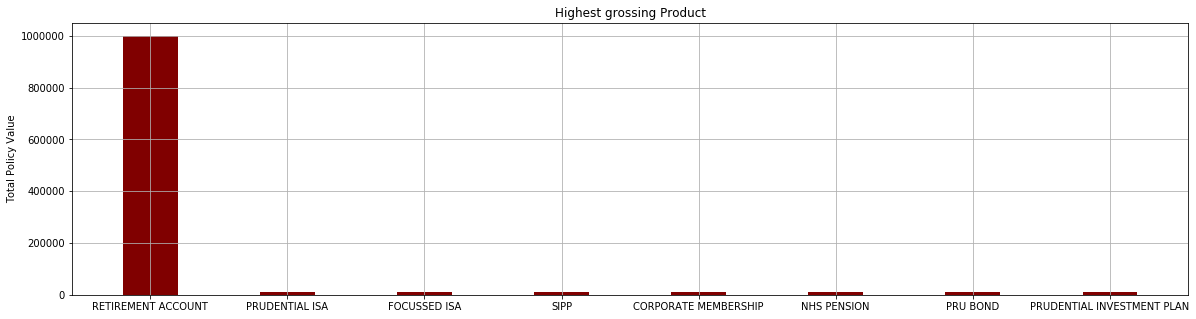

In [135]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.bar(Policy_Table['Product Name'], Policy_Table['Policy Value'], color ='maroon', width = 0.4)
plt.title('Highest grossing Product')
plt.ylabel('Total Policy Value')
plt.grid(True)
plt.show()